比賽：Spaceship Titanic
（預測哪種類型的乘客會去異次元空間）

選擇動機：與老師上課所教授的Titanic - Machine Learning from Disaster相似，可觀察自己是否能在有範例程式碼的情況下，更改成相似比賽所需要的程式，並加強自己對資料集的觀察，以及加深對各個函數的了解與應用，活用上課做得筆記，以更快了解函數意義。

導入模組

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

讀入資料集，並使用df.head()拿到前五筆資料，使用df.info()查看每個欄位的資料類型、是數值還是字元、是否有缺失值等。

In [3]:
df = pd.read_csv("data/train.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


欄位說明：
PassengerId-是每一個乘客的專屬編號，由六位數組成，前四碼為團隊編號，表示可能是一起參加旅行的團體，後兩碼表示團內編號，團體通常以家庭為單位，但仍不一定。

HomePlanet-乘客所屬星球。

CryoSleep – 乘客是否選擇在整個航行期間進行冷凍休眠，通常被用在長途太空旅行中，乘客會被限制在自己的艙室（Cabin）內，不得外出。（True/False值）

Cabin -乘客的床鋪位置以deck/num/side形式表示，其中side分為P for Port or S for Starboard。

Destination-乘客目的地。

Age -乘客年齡。

VIP-乘客是否在航程中付費享受特別VIP服務。（True/False值）

RoomService、FoodCourt、ShoppingMall、Spa、VRDeck -乘客在太空船上，在不同豪華設施上所消費的金額，有房間服務、美食廣場、購物中心、水療、VR體驗。

Name -乘客姓名。

Transported-乘客是否進入異次元空間，此為要預測的目標值。（True/False值）

將不要的欄位drop掉，並用head拿到前五筆資料以檢查是否已經drop掉不要的欄位。另外，Destination並不會影響乘客是否會去到異次元空間，因為進入異次元空間是在航程途中發生。

In [4]:
df.drop(['Name','Cabin','Destination'],axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


觀察要預測的目標值Transported與其他欄位之間的關聯，會發現因為Transported只有true和false兩種可能，所以圖形會長得相似。

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

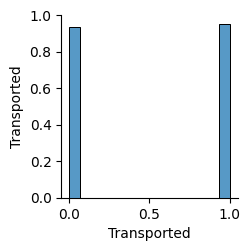

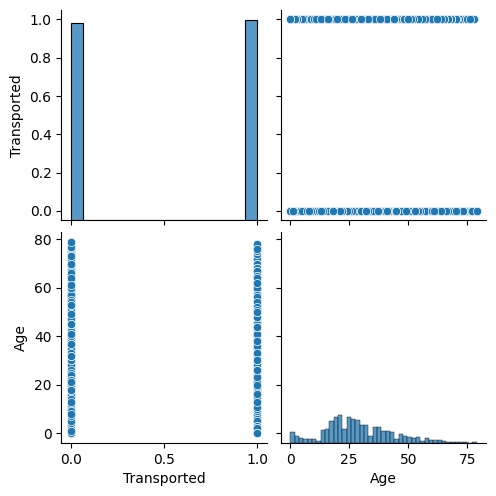

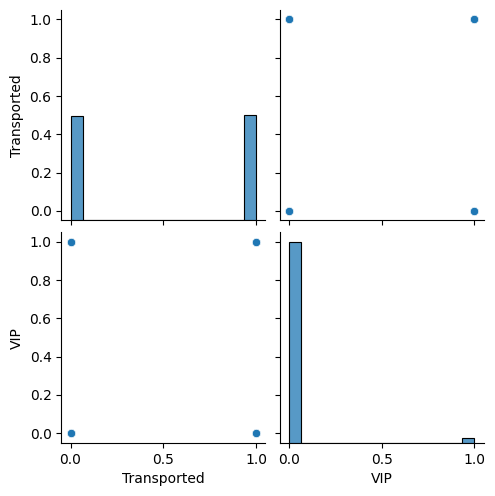

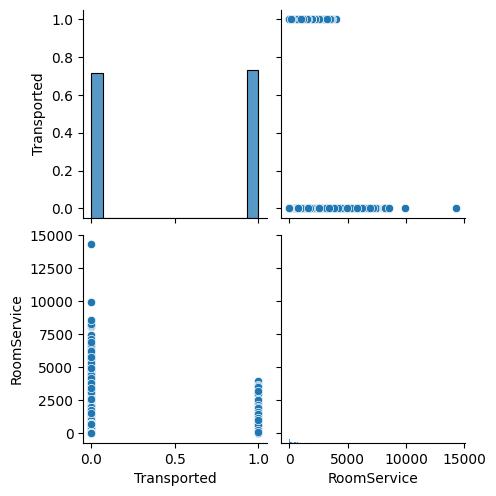

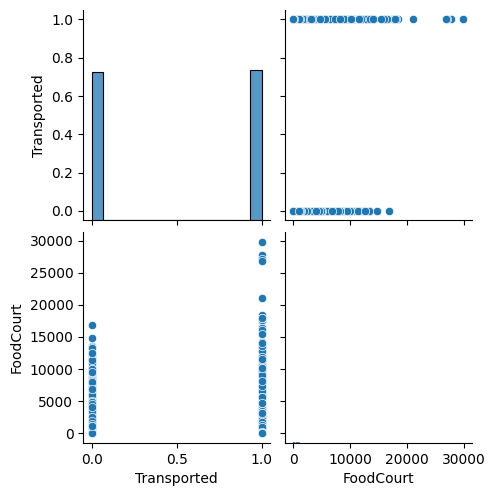

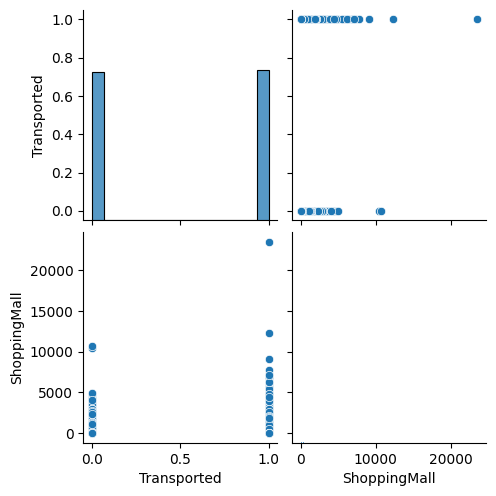

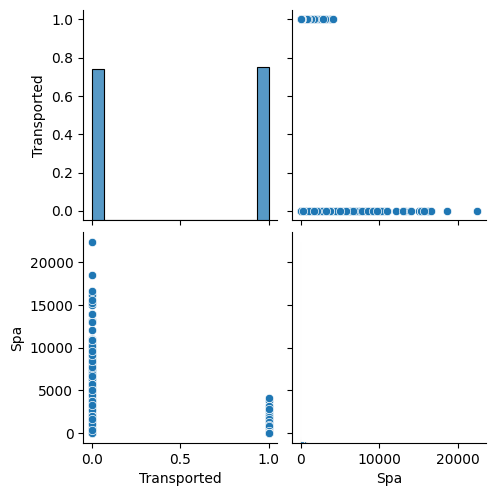

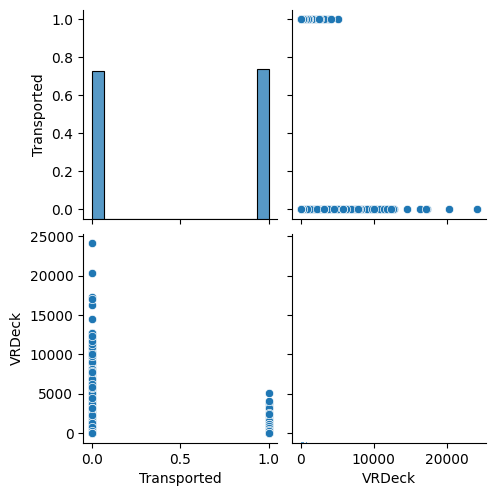

In [5]:
sns.pairplot(df[['Transported','HomePlanet']], dropna=True)
sns.pairplot(df[['Transported','Age']], dropna=True)
sns.pairplot(df[['Transported','VIP']], dropna=True)
sns.pairplot(df[['Transported','RoomService']], dropna=True)
sns.pairplot(df[['Transported','FoodCourt']], dropna=True)
sns.pairplot(df[['Transported','ShoppingMall']], dropna=True)
sns.pairplot(df[['Transported','Spa']], dropna=True)
sns.pairplot(df[['Transported','VRDeck']], dropna=True)

從上面的圖可以看到，VIP在右上跟左下的圖不會顯示出其他東西，因為不是數值

接著進行data obseving，首先用Transported分組，只會將有數值的欄位作平均。

In [6]:
df.groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


從groupby可以看出，不會進到異次元（False）的乘客，平均年齡稍高，使用RoomService、Spa、VRDeck的金額高出許多

看看多少欄位有缺失值

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

再來觀察每個欄位的分布狀況，利用value_counts計算出每個列的值的出現次數，並且按照從高到低的順序輸出每個值的次數。

In [8]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [10]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [11]:
df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

再來觀察欄位的眾數

In [12]:
df['HomePlanet'].value_counts().idxmax()

'Earth'

In [13]:
df['CryoSleep'].value_counts().idxmax()

False

In [14]:
df['VIP'].value_counts().idxmax()

False

In [15]:
df['Age'].value_counts().idxmax()

24.0

使用最常見的值（眾數）填充缺失值

In [16]:
df['Age'].fillna(df['Age'].value_counts().idxmax(), inplace=True)
df['VIP'].fillna(df['VIP'].value_counts().idxmax(), inplace=True)
df['HomePlanet'].fillna(df['HomePlanet'].value_counts().idxmax(), inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].value_counts().idxmax(), inplace=True)

對RoomService、FoodCourt、ShoppingMall、Spa 和 VRDeck 這五個欄位使用了groupby()函數，用Age進行分組，並且對每一個欄位的缺失值使用了中位數填補（fillna）。

In [17]:
df['RoomService'] = df.groupby('Age')['RoomService'].apply(lambda x: x.fillna(x.median()))
df['FoodCourt'] = df.groupby('Age')['FoodCourt'].apply(lambda x: x.fillna(x.median()))
df['ShoppingMall'] = df.groupby('Age')['ShoppingMall'].apply(lambda x: x.fillna(x.median()))
df['Spa'] = df.groupby('Age')['Spa'].apply(lambda x: x.fillna(x.median()))
df['VRDeck'] = df.groupby('Age')['VRDeck'].apply(lambda x: x.fillna(x.median()))

再檢查一次是否填補完空值

In [18]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

將HomePlanet的類別（Earth、Europa、Mars）轉換為數值二元變數（0或1），並刪除原本的HomePlanet欄位。

In [19]:
df = pd.get_dummies(data=df, columns=['HomePlanet'])
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0


查看各个數值型變量（int64和float64）之间的相關係數，指衡量两个變量之间相關程度的统計量，範圍從-1（高度負相關）到1（高度正相關），數值越接近-1或1，表示兩個變量之間的相關性越强。

In [20]:
df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
CryoSleep,1.000000,-0.072235,-0.078281,-0.244017,-0.206081,-0.207797,-0.198294,-0.192721,0.460132,-0.107231,0.093395,0.032715
Age,-0.072235,1.000000,0.092271,0.069078,0.129427,0.033620,0.120694,0.099583,-0.074153,-0.200187,0.217005,0.015410
VIP,-0.078281,0.092271,1.000000,0.056558,0.125189,0.018412,0.061064,0.123061,-0.037261,-0.162345,0.147008,0.043523
RoomService,-0.244017,0.069078,0.056558,1.000000,-0.015294,0.052322,0.009227,-0.018638,-0.241072,-0.140544,-0.066666,0.245330
FoodCourt,-0.206081,0.129427,0.125189,-0.015294,1.000000,-0.013744,0.223218,0.224085,0.044829,-0.214099,0.364114,-0.124887
ShoppingMall,-0.207797,0.033620,0.018412,0.052322,-0.013744,1.000000,0.014538,-0.007849,0.009392,-0.071912,-0.021154,0.111654
Spa,-0.198294,0.120694,0.061064,0.009227,0.223218,0.014538,1.000000,0.147656,-0.218536,-0.159135,0.266125,-0.087995
VRDeck,-0.192721,0.099583,0.123061,-0.018638,0.224085,-0.007849,0.147656,1.000000,-0.204873,-0.154064,0.282556,-0.111863
Transported,0.460132,-0.074153,-0.037261,-0.241072,0.044829,0.009392,-0.218536,-0.204873,1.000000,-0.168845,0.176916,0.019544
HomePlanet_Earth,-0.107231,-0.200187,-0.162345,-0.140544,-0.214099,-0.071912,-0.159135,-0.154064,-0.168845,1.000000,-0.633221,-0.559658


準備training data，將要預測的欄位丟掉，因為是要產出它的預測值，y則代表集合所有的Transported。

In [21]:
X = df.drop(['Transported','CryoSleep'],axis=1)
y = df['Transported']

Split data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

使用scikit-learn函數庫中的LogisticRegression模型對X_train和 y_train進行訓練，並使用訓練好的模型对測試數據X_test進行預測。fit是指把訓練資料和訓練對應的答案丟進去。

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(max_iter=200)

In [29]:
lr.fit(X_train,y_train)

c:\Users\maruk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [30]:
predictions = lr.predict(X_test)

導入模組，confusion_matrix是一个用於分類指標的矩陣，計算真正例（True Transported）、假正例（False Transported）、真反例（True Not Transported）和假反例（False Not Tansported）的樣本數量，而後表示在一個矩陣中，行代表真正的數據，列代表預測出的數據。

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score

計算精準度，模型正確預測True和False的樣本占總樣本的比例。

In [25]:
accuracy_score(y_test,predictions)

0.7818251533742331

計算召回率，即實際上為True而模型預測也是True的樣本占所有樣本為True的比例，觀察模型能正確辨別出True的能力。

In [26]:
recall_score(y_test, predictions)

0.9054878048780488

計算準確率，即模型預測為True且實際上也為True的樣本佔模型預測為True的個數的比例

In [31]:
precision_score(y_test,predictions)

0.7274954072259645

形成矩陣

In [32]:
pd.DataFrame(confusion_matrix(y_test, predictions),columns=['Predict not Transported','Predict Transported'],index=['True not Transported','True Transported'])

,Predict not Transported,Predict Transported
True not Transported,851,445
True Transported,124,1188


導入joblib，將訓練好的模型lr存到pkl檔

In [33]:
import joblib
joblib.dump(lr,'SpaceshipTitanic-LR-20230415.pkl',compress=3)

['SpaceshipTitanic-LR-20230415.pkl']

建立for_submission.py檔

將訓練好的模型檔案導入

In [34]:
import joblib
model_pretrained = joblib.load('SpaceshipTitanic-LR-20230415.pkl')

In [35]:
import pandas as pd

讀進test.csv的資料，開始調整測試資料集的資料以符合模型，在app.py做的資料調整，在submission檔就要做一樣的調整。

In [42]:
df_test = pd.read_csv("test.csv")

In [43]:
df_test.drop(['Name','Cabin','Destination'],axis=1, inplace=True)

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB


注意fillna和groupby的執行順序，不然在isnull檢查時會發現還有很多空值沒填補，盡量要與app.py檔調整資料的順序相同。

In [45]:
df_test['Age'].fillna(df_test['Age'].value_counts().idxmax(), inplace=True)
df_test['VIP'].fillna(df_test['VIP'].value_counts().idxmax(), inplace=True)
df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(), inplace=True)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(), inplace=True)

In [46]:
df_test['RoomService'] = df_test.groupby('Age')['RoomService'].apply(lambda x: x.fillna(x.median()))
df_test['FoodCourt'] = df_test.groupby('Age')['FoodCourt'].apply(lambda x: x.fillna(x.median()))
df_test['ShoppingMall'] = df_test.groupby('Age')['ShoppingMall'].apply(lambda x: x.fillna(x.median()))
df_test['Spa'] = df_test.groupby('Age')['Spa'].apply(lambda x: x.fillna(x.median()))
df_test['VRDeck'] = df_test.groupby('Age')['VRDeck'].apply(lambda x: x.fillna(x.median()))

In [47]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [48]:
df_test = pd.get_dummies(data=df_test, columns=['HomePlanet'])

In [49]:
df_test.drop(['CryoSleep'],axis=1, inplace=True)

使用已經訓練好的模型對test.csv進行預測，將結果存在predictions2。

In [50]:
predictions2 = model_pretrained.predict(df_test)
predictions2

array([ True, False,  True, ...,  True,  True,  True])

建立forSubmissionDF，並且新增了兩個欄位 PassengerId和Transported，分別用來儲存 test.csv檔中的乘客ID與預測其是否會進入異次元空間的結果。其中，pd.read_csv('test.csv')['PassengerId']的作用是讀取test.csv檔案中的乘客ID欄位。最後，forSubmissionDF會儲存所有乘客的預測結果。

In [51]:
forSubmissionDF = pd.DataFrame(columns=['PassengerId','Transported'])

In [52]:
forSubmissionDF['PassengerId'] = pd.read_csv('test.csv')['PassengerId']

In [53]:
forSubmissionDF['Transported'] = predictions2

In [54]:
forSubmissionDF

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


可看出與test.csv總行數相同

In [55]:
forSubmissionDF.to_csv('for_submission_adela.csv',index=False)

延伸學習1：
一開始觀察各個欄位空值的狀況，不太清楚要使用何種方使填補資料，首先應該清楚資料類型，判斷要使用中位數還是眾數填補空值，這取决於缺失值所在的列的數據類型（數字或字串）和分布。當缺失值所在的列是數值型數據，並且分布不受极端值影響時，使用median較佳，因為中位數不受極端值影響。當缺失值所在的列是類別型（True或False等）或著分布受極端值影響時，使用眾數填補更好，因為idxmax返回的是該列中出現頻率最多次的值。

延伸學習2：
在Prepare training data時，發現正確寫法應跟從上課所教
X = df.drop(['Transported','CryoSleep'],axis=1)
y = df['Transported']

原本我的程式為
X = df['PassengerId']
y = df['Transported']

發現這樣在for_submission.py檔中，會出現錯誤，因為我只讓PassengerId去預測Transported，我的df_test中的特徵和訓練模型時使用的特徵不同，但在預測時必須使用相同的特徵，所以我應使用上課方法，將目標變數y中的transported在X中drop掉，因為要預測的是Transported，再觀察是否還有其他值不需要。

比賽結果：0.78396

還能如何改善？我認為有三種方法：

1.select feature：從另一堂時間序列課程中，我認知到feature是多麼重要，要先知道資料特徵，才能了解應該使用甚麼欄位、變數去做機器學習，刪除不重要的特徵後，可以提高準確性，也應更仔細地去觀察變數之間的相關程度。

2.data cleansing：在資訊系統中，常會使用資料清洗：指辨識資料庫中資料的不完整、不正確或不相關的部分，然後進行替換、修改或刪除資料的過程（此段與系上必修課程做連結）。我認為機器學習亦是如此，對缺失值、異常值等進行清理，使資料更加乾淨。

3.使用其他機器學習方法：可以使用如隨機森林、梯度提升樹等方法，形成混合模型，進一步提高準確性。

But！因為每個問題和資料集都是不同的，所以在修改程式以提高準確率時，需要根據具體情況選擇合適的方法。如Store-sales forecasting...是使用時間序列方法。